## Análisis Exploratorio de Datos - Propensión de Compra

## Importación de librerías.

In [1564]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import numpy as np
import re
from tabulate import tabulate
from sklearn.cluster import KMeans
import os
from urllib.parse import urlparse
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_score,
    recall_score,
)

## Importación e información del dataframe

In [1565]:
df = pd.read_csv('data/raw/Propensity.csv', delimiter=',', index_col=0)

In [1566]:
# Número de filas y columnas
print(df.shape)  

(58049, 23)


In [1567]:
# Primeras filas del DataFrame
df.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,...,Medio,NO DATA,No,NO,1376,0,True,4,21,3
CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Madrid,...,Medio,SI,Averia muy grave,SI,2015,7256,True,4,48,5
CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,...,Alto,NO DATA,No,NO,1818,0,True,3,21,3


In [1568]:

df.dtypes

PRODUCTO           object
TIPO_CARROCERIA    object
COMBUSTIBLE        object
Potencia           object
TRANS              object
FORMA_PAGO         object
ESTADO_CIVIL       object
GENERO             object
OcupaciOn          object
PROVINCIA          object
Campanna1          object
Campanna2          object
Campanna3          object
Zona_Renta         object
REV_Garantia       object
Averia_grave       object
QUEJA_CAC          object
COSTE_VENTA         int64
km_anno             int64
Mas_1_coche          bool
Revisiones          int64
Edad_Cliente        int64
Tiempo              int64
dtype: object

In [1569]:
df.columns

Index(['PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia', 'TRANS',
       'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'PROVINCIA',
       'Campanna1', 'Campanna2', 'Campanna3', 'Zona_Renta', 'REV_Garantia',
       'Averia_grave', 'QUEJA_CAC', 'COSTE_VENTA', 'km_anno', 'Mas_1_coche',
       'Revisiones', 'Edad_Cliente', 'Tiempo'],
      dtype='object')

### Descripción de las Variables del Dataset

| **Variable**      | **Descripción** |
|------------------|------------------------------------------------|
| `CODE`          | Código único del cliente. |
| `PRODUCTO`      | Modelo de coche adquirido. |
| `TIPO_CARROCERIA` | Tipo de carrocería del coche (SUV, Sedán, etc.). |
| `COMBUSTIBLE`   | Tipo de combustible utilizado (Gasolina, Diésel, etc.). |
| `Potencia`      | Potencia del coche en caballos de fuerza. |
| `TRANS`         | Tipo de transmisión (Manual o Automática). |
| `FORMA_PAGO`    | Método de pago (Financiado o Contado). |
| `ESTADO_CIVIL`  | Estado civil del cliente al momento de la compra. |
| `GENERO`        | Género del cliente (Masculino o Femenino). |
| `OcupaciOn`     | Ocupación del cliente en el momento de la compra. |
| `PROVINCIA`     | Provincia de residencia del cliente. |
| `Campanna1`     | Si el cliente recibió un descuento por financiar (Sí/No). |
| `Campanna2`     | Si el cliente recibió un descuento por adquirir un seguro (Sí/No). |
| `Campanna3`     | Si el cliente recibió un descuento por extender la garantía (Sí/No). |
| `Zona_Renta`    | Nivel de renta promedio en la zona de residencia del cliente. |
| `REV_Garantia`  | Si el coche sigue en garantía. |
| `Averia_grave`  | Si el coche ha tenido una avería grave y de qué tipo. |
| `QUEJA_CAC`     | Si el cliente ha contactado con atención al cliente por alguna queja. |
| `COSTE_VENTA`   | Suma de descuentos aplicados en la venta. |
| `km_anno`       | Kilometraje medio recorrido por el coche al año. |
| `Mas_1_coche`   | Indica si el cliente ha comprado más de un coche. |
| `Revisiones`    | Número de revisiones pasadas del coche. |
| `Edad_Cliente`  | Edad actual del cliente. |
| `Tiempo`        | Años transcurridos entre compras de coches por el cliente. |



In [1570]:
df.describe(include='all')

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
count,58049,58049,58049,58049,58049,58049,57159,57189,58049,58049,...,44871,58049,58048,58049,58049.000000,58049.000000,58049,58049.000000,58049.000000,58049.000000
unique,11,8,2,3,2,4,4,2,3,53,...,4,2,4,2,NaN,NaN,2,NaN,NaN,NaN
top,B,TIPO1,FUEL 2,Media,M,Contado,CASADO,M,Empresa,Madrid,...,Alto,NO DATA,No,NO,NaN,NaN,False,NaN,NaN,NaN
freq,15993,23387,33085,39906,52969,30190,43529,40170,53262,10874,...,17152,32011,29935,36268,NaN,NaN,41107,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2540.125756,11805.893607,NaN,3.529587,47.351255,1.859119
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1603.556511,10205.363971,NaN,2.528413,11.239984,3.091309
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,18.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1595.000000,0.000000,NaN,1.000000,40.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2353.000000,11486.000000,NaN,3.000000,48.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3301.000000,17927.000000,NaN,5.000000,56.000000,4.000000


### Limpieza de datos.

El dataset cuenta con un total de 24 columnas que debemos analizar para determinar cuáles serán relevantes en nuestro estudio. Para ello, es importante comprender el significado de cada una de ellas y su posible impacto en el análisis.

#### Manejo de filas duplicadas.

En caso de haber filas duplicadas, deberemos de eliminar estas para que no afecten al análisis posterior.

In [1571]:
df.duplicated().sum() # Columnas duplicadas

np.int64(144)

In [1572]:
df.drop_duplicates(inplace=True)

#### Manejo de filas nulas.

In [1573]:
df.isnull().sum() # Valores nulos

PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia               0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         890
GENERO               860
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona_Renta         13064
REV_Garantia           0
Averia_grave           1
QUEJA_CAC              0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad_Cliente           0
Tiempo                 0
dtype: int64

In [1574]:
df.shape[0]

57905

In [1575]:
df.dropna(subset=['Averia_grave'], inplace=True)

In [1576]:
# Rellenar valores faltantes con la moda
for i in ['ESTADO_CIVIL', 'GENERO']:
    df[i] = df[i].fillna(df[i].mode()[0])

### Selección de variables categóricas y continuas.


Para realizar correctamente un ánalisis de datos debemos de distinguir entre las variables categóricas, variables que representan diferentes categorías o grupos, y continuas, variables que pueden tomar cualquier valor dentro de un rango determinado.

In [1577]:
v_continuas = []
v_categoricas = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64', 'bool']:  # Variables numéricas y booleanas como continuas
        v_continuas.append(col)
    else:
        v_categoricas.append(col)

print('Variables continuas:', ', '.join(v_continuas))
print('Variables categóricas:', ', '.join(v_categoricas))


Variables continuas: COSTE_VENTA, km_anno, Mas_1_coche, Revisiones, Edad_Cliente, Tiempo
Variables categóricas: PRODUCTO, TIPO_CARROCERIA, COMBUSTIBLE, Potencia, TRANS, FORMA_PAGO, ESTADO_CIVIL, GENERO, OcupaciOn, PROVINCIA, Campanna1, Campanna2, Campanna3, Zona_Renta, REV_Garantia, Averia_grave, QUEJA_CAC


Variables continuas (v_continuas):

Columnas numéricas (int64, float64), ya que representan cantidades medibles.
También incluyo las booleanas (bool), ya que pueden ser tratadas como binarias (0/1).

Variables categóricas (v_categoricas):

Columnas de tipo object, que son datos no numéricos como nombres de productos, tipo de combustible, etc.

#### Tratamiento de variables categóricas.

Para el posterior modelo de clasificación, necesitamos codificar nuestras variables object. Para ello, realizaremos una codificación ordinal que consiste en asignar valores enteros a las categorias basándose en su posición o jerarquía en los datos.

In [1578]:
df[v_categoricas].nunique()

PRODUCTO           11
TIPO_CARROCERIA     8
COMBUSTIBLE         2
Potencia            3
TRANS               2
FORMA_PAGO          4
ESTADO_CIVIL        4
GENERO              2
OcupaciOn           3
PROVINCIA          53
Campanna1           2
Campanna2           2
Campanna3           2
Zona_Renta          4
REV_Garantia        2
Averia_grave        4
QUEJA_CAC           2
dtype: int64

In [1579]:
df[v_categoricas].head(3)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC
CODE,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO


In [1580]:
df[v_categoricas].describe()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC
count,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,44840,57904,57904,57904
unique,11,8,2,3,2,4,4,2,3,53,2,2,2,4,2,4,2
top,B,TIPO1,FUEL 2,Media,M,Contado,CASADO,M,Empresa,Madrid,NO,NO,NO,Alto,NO DATA,No,NO
freq,15982,23359,33012,39807,52830,30147,44284,40913,53118,10809,37348,50968,51019,17140,31867,29796,36128


**PRODUCTO.**

In [1581]:
df['PRODUCTO'].unique()

array(['A', 'B', 'C', 'H', 'J', 'D', 'I', 'E', 'F', 'K', 'G'],
      dtype=object)

In [1582]:
label_encoder = LabelEncoder()
df['PRODUCTO'] = label_encoder.fit_transform(df['PRODUCTO'])

In [1583]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**TIPO_CARROCERIA.**

In [1584]:
df['TIPO_CARROCERIA'].unique()

array(['TIPO1', 'TIPO6', 'TIPO4', 'TIPO7', 'TIPO8', 'TIPO2', 'TIPO3',
       'TIPO5'], dtype=object)

In [1585]:
label_encoder = LabelEncoder()
df['TIPO_CARROCERIA'] = label_encoder.fit_transform(df['TIPO_CARROCERIA'])

In [1586]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**COMBUSTIBLE.**

In [1587]:
df['COMBUSTIBLE'].unique()

array(['FUEL 1', 'FUEL 2'], dtype=object)

In [1588]:
label_encoder = LabelEncoder()
df['COMBUSTIBLE'] = label_encoder.fit_transform(df['COMBUSTIBLE'])

In [1589]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**Potencia.**

Se utilizará OrdinalEncoder en las variables que presentan un orden lógico en sus categorías:
Potencia: Baja < Media < Alta.
Zona_Renta: Medio-Bajo < Medio < Alto < Otros.
Averia_grave: No < Averia leve < Averia grave < Averia muy grave.
Para el resto de las variables categóricas, que no tienen un orden inherente, se aplicará LabelEncoder, asegurando que cada categoría sea representada por un valor numérico sin introducir una jerarquía artificial.

In [1590]:
# Definición del orden lógico de las variables ordinales.
#ordinal_cols = {
   # "Potencia": ["Baja", "Media", "Alta"],
#}
## "Zona_Renta": ["Otros", "Medio-Bajo", "Medio", "Alto"],
##    "Averia_grave": ["No", "Averia leve", "Averia grave", "Averia muy grave"]

In [1591]:
#ordinal_encoder = OrdinalEncoder(categories=[ordinal_cols[col] for col in ordinal_cols])
#df[list(ordinal_cols.keys())] = ordinal_encoder.fit_transform(df[list(ordinal_cols.keys())])

In [1592]:
orden_correcto = ["Baja", "Media", "Alta"]
encoder = OrdinalEncoder(categories=[orden_correcto])
df["Potencia"] = encoder.fit_transform(df[["Potencia"]])

In [1593]:
cols = df.columns.tolist()
indice_potencia = cols.index("Potencia")
cols.insert(indice_potencia + 1, cols.pop(cols.index("Potencia")))
df = df[cols]

In [1594]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,M,0.0,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,M,0.0,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**TRANS.**

In [1595]:
df['TRANS'].unique()

array(['M', 'A'], dtype=object)

In [1596]:
label_encoder = LabelEncoder()
df['TRANS'] = label_encoder.fit_transform(df['TRANS'])

In [1597]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**FORMA_PAGO.**

In [1598]:
df['FORMA_PAGO'].unique()

array(['Contado', 'Otros', 'Financiera Marca', 'Financiera Banco'],
      dtype=object)

In [1599]:
label_encoder = LabelEncoder()
df['FORMA_PAGO'] = label_encoder.fit_transform(df['FORMA_PAGO'])

In [1600]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**ESTADO_CIVIL.**

In [1601]:
df['ESTADO_CIVIL'].unique()

array(['CASADO', 'SOLTERO', 'OTROS', 'EN PAREJA'], dtype=object)

In [1602]:
label_encoder = LabelEncoder()
df['ESTADO_CIVIL'] = label_encoder.fit_transform(df['ESTADO_CIVIL'])

In [1603]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**GENERO.**

In [1604]:
df['GENERO'].unique()

array(['M', 'F'], dtype=object)

In [1605]:
label_encoder = LabelEncoder()
df['GENERO'] = label_encoder.fit_transform(df['GENERO'])

In [1606]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**OcupaciOn.**

In [1607]:
df['OcupaciOn'].unique()

array(['Empresa', 'Funcionario', 'Autonomo'], dtype=object)

In [1608]:
label_encoder = LabelEncoder()
df['OcupaciOn'] = label_encoder.fit_transform(df['OcupaciOn'])

In [1609]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**PROVINCIA.**

In [1610]:
df['PROVINCIA'].unique()

array(['Asturias', 'Toledo', 'Lerida', 'Madrid', 'Santa Cruz de Tenerife',
       'Pontevedra', 'Lacoruna', 'Barcelona', 'Cordoba', 'Guipuzcua',
       'Valladolid', 'Castellon', 'Valencia', 'Las Palmas', 'La Rioja',
       'Baleares', 'Zaragoza', 'Alicante', 'Tarragona', 'Leon', 'Lugo',
       'Badajoz', 'Vizcaya', 'Sevilla', 'Guadalajara', 'Ciudad Real',
       'Cantabria', 'Orense', 'Navarra', 'Gerona', 'Malaga', 'Jaen',
       'Murcia', 'Burgos', 'Granada', 'Alava', 'Cuenca', 'Cadiz',
       'Salamanca', 'Albacete', 'Almeria', 'Teruel', 'Segovia',
       'Palencia', 'Huelva', 'Huesca', 'Zamora', 'Avila', 'Soria',
       'Caceres', 'Melilla', 'Ceuta', 'Francia'], dtype=object)

In [1611]:
label_encoder = LabelEncoder()
df['PROVINCIA'] = label_encoder.fit_transform(df['PROVINCIA'])

In [1612]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


**Campanna1, Campanna2, Campanna3.**

In [1613]:
df[['Campanna1', 'Campanna2', 'Campanna3']].apply(pd.Series.unique)

,Campanna1,Campanna2,Campanna3
0,SI,NO,NO
1,NO,SI,SI


In [1614]:
label_encoder = LabelEncoder()

for col in ['Campanna1', 'Campanna2', 'Campanna3']:
    df[f'{col}'] = label_encoder.fit_transform(df[col])

In [1615]:
label_encoder = LabelEncoder()

for col in ['Campanna1', 'Campanna2', 'Campanna3']:
    df[f'{col}'] = label_encoder.fit_transform(df[col])
    cols = df.columns.tolist()
    disclosure_index = cols.index(col)
    cols.insert(disclosure_index + 1, cols.pop(cols.index(f'{col}')))
    df = df[cols]

In [1616]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Campanna3,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,0,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,0,SI,No,NO,1376,7187,False,2,53,0


**Zona_Renta**                                .... COMPROBAR LO DE OTROS Q ES?

In [1617]:
df["Zona_Renta"] = df["Zona_Renta"].fillna("Desconocido")

In [1618]:
df['Zona_Renta'].unique()

array(['Medio-Bajo', 'Medio', 'Alto', 'Desconocido', 'Otros'],
      dtype=object)

In [1619]:
orden_correcto = ["Medio-Bajo", "Medio", "Alto", "Otros", "Desconocido"]
encoder = OrdinalEncoder(categories=[orden_correcto])
df["Zona_Renta"] = encoder.fit_transform(df[["Zona_Renta"]])

In [1620]:
cols = df.columns.tolist()
indice_potencia = cols.index("Zona_Renta")
cols.insert(indice_potencia + 1, cols.pop(cols.index("Zona_Renta")))
df = df[cols]

In [1621]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,0.0,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,0.0,SI,No,NO,1376,7187,False,2,53,0


**REV_Garantia**

In [1622]:
df['REV_Garantia'].unique()

array(['NO DATA', 'SI'], dtype=object)

In [1623]:
label_encoder = LabelEncoder()
df['REV_Garantia'] = label_encoder.fit_transform(df['REV_Garantia'])

In [1624]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,0.0,0,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,0.0,1,No,NO,1376,7187,False,2,53,0


**Averia_grave**   ..

In [1625]:
df['Averia_grave'].unique()

array(['Averia muy grave', 'No', 'Averia leve', 'Averia grave'],
      dtype=object)

In [1626]:
label_encoder = LabelEncoder()
df['Averia_grave'] = label_encoder.fit_transform(df['Averia_grave'])

In [1627]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,0.0,0,2,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,0.0,1,3,NO,1376,7187,False,2,53,0


**QUEJA_CAC**

In [1628]:
df['QUEJA_CAC'].unique()

array(['SI', 'NO'], dtype=object)

In [1629]:
label_encoder = LabelEncoder()
df['QUEJA_CAC'] = label_encoder.fit_transform(df['QUEJA_CAC'])

In [1630]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,0.0,0,2,1,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,0.0,1,3,0,1376,7187,False,2,53,0


#### Tratamiento de variables continuas.

In [1631]:
df[v_continuas].nunique()

COSTE_VENTA      2833
km_anno         21511
Mas_1_coche         2
Revisiones         14
Edad_Cliente       54
Tiempo             14
dtype: int64

In [1632]:
df[v_continuas].head(3)

,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,
CLI1,2892,0,False,2,18,0
CLI2,1376,7187,False,2,53,0
CLI3,1376,0,True,4,21,3


In [1633]:
df[v_continuas].describe()

,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Tiempo
count,57904.000000,57904.000000,57904.000000,57904.000000,57904.000000
mean,2540.657416,11832.042847,3.535559,47.362255,1.862497
std,1605.129977,10201.406504,2.527840,11.225932,3.093356
min,0.000000,0.000000,0.000000,18.000000,0.000000
25%,1595.000000,0.000000,1.000000,40.000000,0.000000
50%,2353.000000,11505.000000,3.000000,48.000000,0.000000
75%,3309.000000,17938.000000,5.000000,56.000000,4.000000
max,18455.000000,182331.000000,13.000000,71.000000,14.000000


#### Manejo de Valores Atípicos.

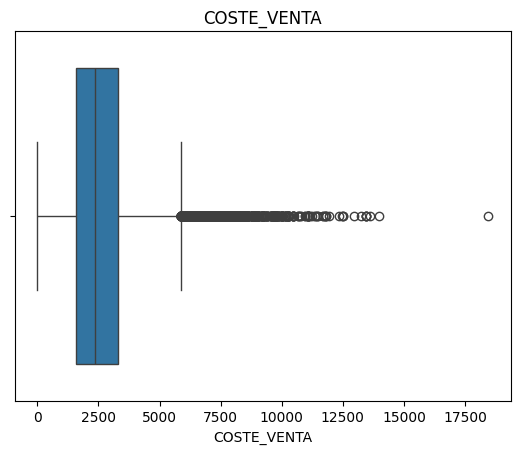

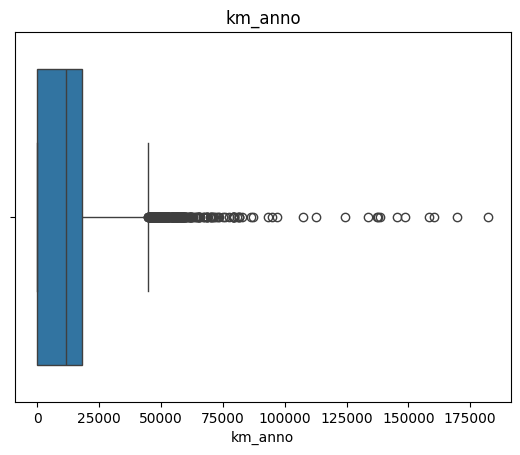

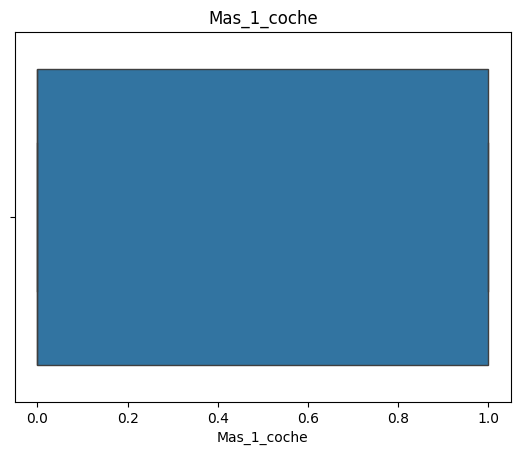

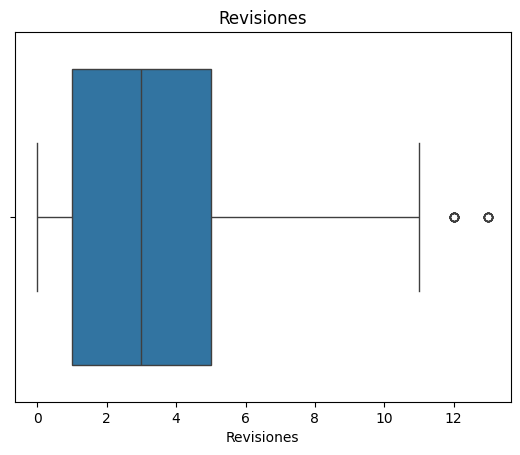

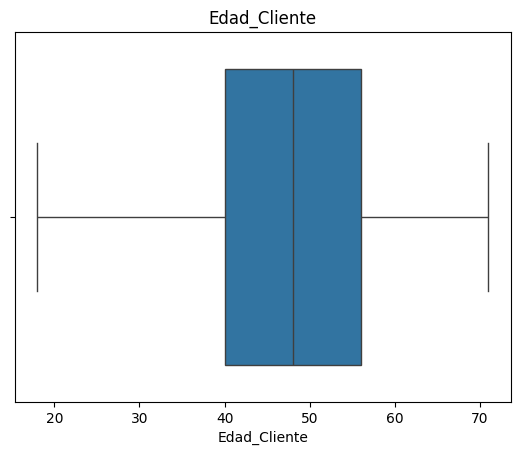

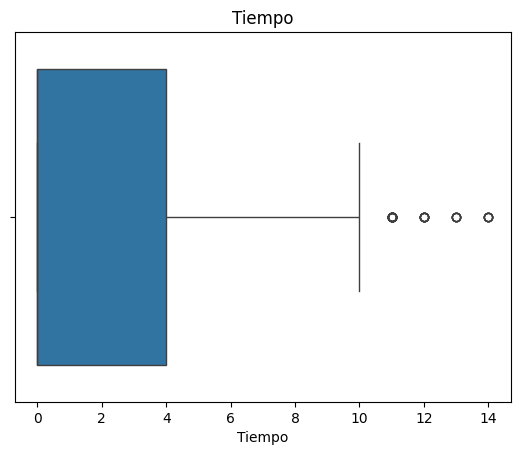

In [1634]:
for col in v_continuas:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()